# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [2]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/auto-mpg.csv")

### Step 3. Perform basic EDA to understand the structure of the data

In [3]:
mpg_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
246,32.8,4,78.0,52,1985,19.4,78,3,mazda glc deluxe
198,33.0,4,91.0,53,1795,17.4,76,3,honda civic
317,34.3,4,97.0,78,2188,15.8,80,2,audi 4000
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw)
335,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe
343,39.1,4,79.0,58,1755,16.9,81,3,toyota starlet
310,38.1,4,89.0,60,1968,18.8,80,3,toyota corolla tercel
68,13.0,8,350.0,155,4502,13.5,72,1,buick lesabre custom
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
233,29.0,4,97.0,78,1940,14.5,77,2,volkswagen rabbit custom


In [4]:
mpg_df.shape

(398, 9)

In [5]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
mpg_df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Step 4. Check and handle the missing values, if any.

In [9]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
# there is some ? in horsepoer column
# replacing it by nan
mpg_df['horsepower'].replace(to_replace=['?'],value=[np.nan],inplace=True)
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

In [11]:
### check for duplicates
duplicate = mpg_df.duplicated()
duplicate.sum()

0

In [12]:
mpg_df['horsepower'] = mpg_df['horsepower'].astype(float)

In [13]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
mpg_df['horsepower'].replace(to_replace=[np.nan],value=[mpg_df['horsepower'].median()],inplace=True)

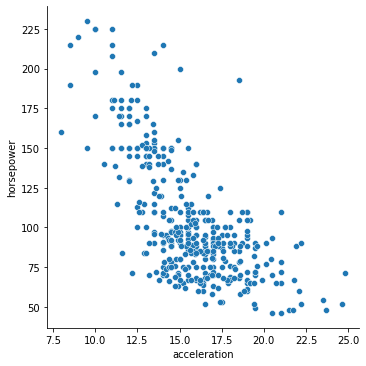

In [19]:
sns.relplot(x='acceleration',y='horsepower',data=mpg_df)

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

In [20]:
# from pylab import *
# subplot(2,2,1)
# sns.distplot(mpg_df.acceleration)
# subplot(2,2,2)
# sns.distplot(mpg_df.displacement)
# subplot(2,2,3)
# sns.distplot(mpg_df.weight)
# subplot(2,2,4)
# sns.distplot(mpg_df.mpg)

array([[<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'mpg'}>]], dtype=object)

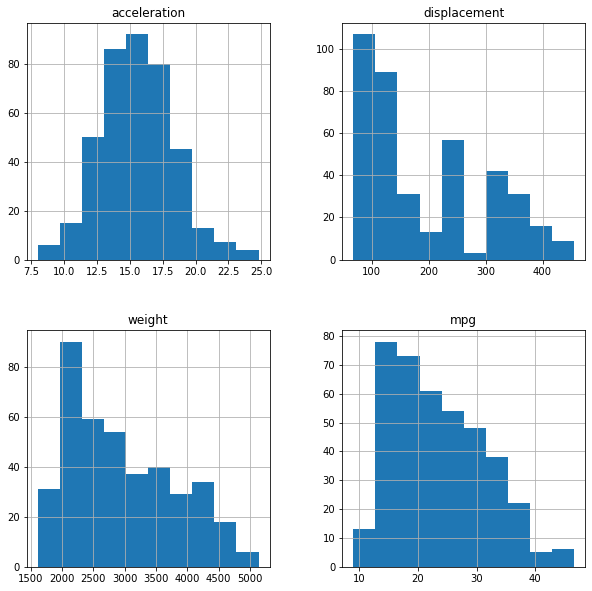

In [22]:
mpg_df[['acceleration', 'displacement', 'weight', 'mpg']].hist(figsize=(10,10))

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

In [39]:
# sns.relplot(x=mpg_df.displacement, y=mpg_df.weight, hue = mpg_df.origin, data = mpg_df)

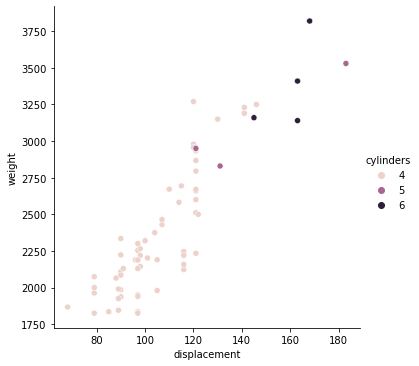

In [26]:
mpg_df[['displacement','weight','cylinders','origin']][mpg_df['origin'] == 2]
sns.relplot(x="displacement", y="weight", hue = "cylinders",
            data = mpg_df[['displacement','weight','cylinders','origin']][mpg_df['origin'] == 2])

plt.savefig('plot.png')

It is observed that displacement and weight have strong positive correlation. Based on cylinder classes we can see that 6 cyinder engine have higher displacement and higher weight and for 4 cylinder engines it is the least.

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

<AxesSubplot:xlabel='origin', ylabel='count'>

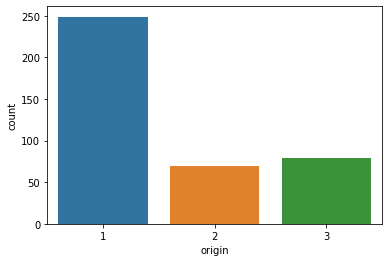

In [27]:
sns.countplot(x = 'origin', data=mpg_df)

From the plot it is observed that most cars in origin class 1 followed by 3 and 2. The sum of origin 2 and origin 3 are much lower than origin 1 counts.

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

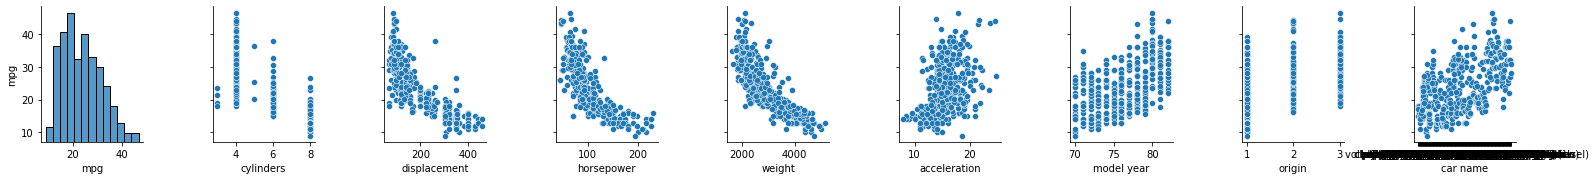

In [29]:
sns.pairplot(mpg_df, y_vars="mpg", x_vars=mpg_df.columns.values)

displacement, horsepower, weight shows similar trend with respect to mpg. The variation is similar to exponential reduction of mpg as displacement/horsepower/weight increases. As acceleration increases mpg also increases. in latest model it is observed that mpg is rising. 4 cylinder engine shows highest mpg.

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

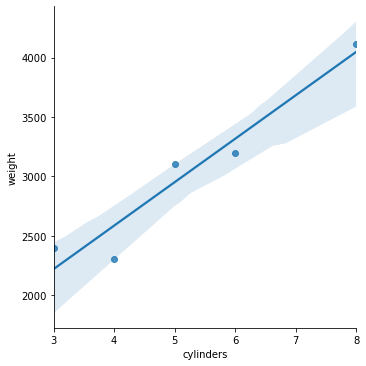

In [30]:
sns.lmplot(x='cylinders', y = 'weight', data = mpg_df[['weight','cylinders']].groupby('cylinders').mean().reset_index())

Mean weight verses cylinder numbers shows almost a linear relationship with positive corelation

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

<AxesSubplot:>

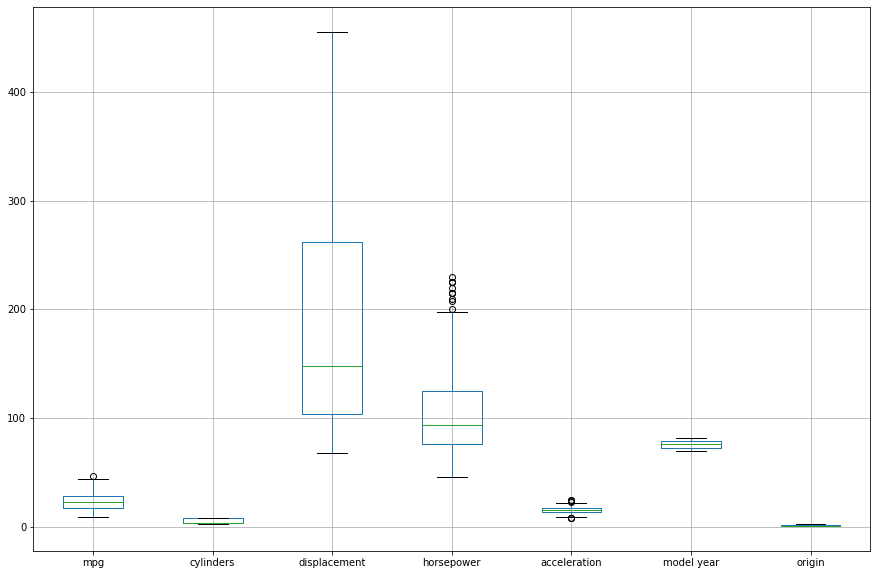

In [34]:
column=['mpg','cylinders','displacement','horsepower','acceleration','model year','origin']
mpg_df.boxplot(column,figsize=(15,10))

<AxesSubplot:>

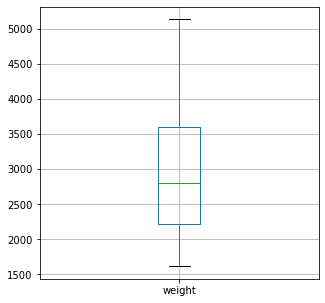

In [38]:
mpg_df.boxplot('weight',figsize=(5,5))

outlier are present only in mpg, horsepower and accleration columns and for the other columns the data given are within the acceptable range and free from outliers as shown

### Step 12. Plot the correlations for variables.

<AxesSubplot:>

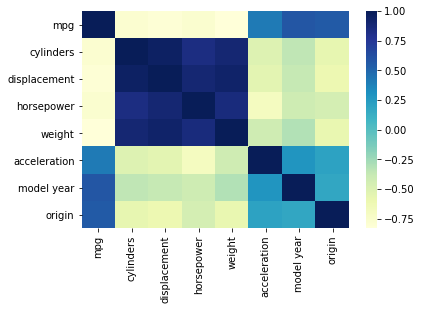

In [31]:
sns.heatmap(mpg_df.corr(), cmap='YlGnBu')